In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import sys
sys.path.append('./../')  # Add the parent directory to Python path
from plot_utils_CY import *

A mysterious treasure map and accompanying note has everyone acting like heroic adventurers. You get to go on a maximum of three expeditions to search for treasure. Your first expedition is free, but the second and third one will come at a cost. Keep in mind that you are not the only one searching and you’ll have to split the spoils with all the others that search in the same spot. Plan your expeditions carefully and you might return with the biggest loot of all. 

Here's a breakdown of how your profit from an expedition will be computed:
Every spot has its **treasure multiplier** (up to 100) and the number of **hunters** (up to 8). The spot's total treasure is the product of the **base treasure** (7500, same for all spots) and the spot's specific treasure multiplier. However, the resulting amount is then divided by the sum of the hunters and the percentage of all the expeditions (from other players) that took place there. For example, if a field has 5 hunters, and 10% of all the expeditions (from all the other players) are also going there, the prize you get from that field will be divided by 15. After the division, **expedition costs** apply (if there are any), and profit is what remains.

Second and third expeditions are optional: you are not required to do all 3. Fee for embarking upon a second expedition is 25 000, and for third it's 75 000. Order of submitted expeditions does not matter for grading.

Strategy:
- If other players know to take above average profit
- If other players know to quit in 2 expeditions
- Some randomness?

In [3]:
multipliers = np.array([[24, 70, 41, 21, 60],
                        [47, 82, 87, 80, 35],
                        [73, 89, 100, 90, 17],
                        [77, 83, 85, 79, 55],
                        [12, 27, 52, 15, 30]])

num_hunters = np.array([[2, 4, 3, 2, 4],
                        [3, 5, 5, 5, 3],
                        [4, 5, 8, 7, 2],
                        [5, 5, 5, 5, 4],
                        [2, 3, 4, 2, 3]])

percentages = np.ones((5, 5)) * 4 # multiplied by 100

base_treasure = 7500
costs = [0, 25000, 75000]

In [4]:
def calculate_profit(percentages):
    total_treasure = base_treasure * multipliers
    divided_profits = total_treasure / (num_hunters + percentages)
    
    return divided_profits

In [5]:
calculate_profit(percentages)

array([[30000.        , 65625.        , 43928.57142857, 26250.        ,
        56250.        ],
       [50357.14285714, 68333.33333333, 72500.        , 66666.66666667,
        37500.        ],
       [68437.5       , 74166.66666667, 62500.        , 61363.63636364,
        21250.        ],
       [64166.66666667, 69166.66666667, 70833.33333333, 65833.33333333,
        51562.5       ],
       [15000.        , 28928.57142857, 48750.        , 18750.        ,
        32142.85714286]])

Strategies for other
- if hunter number is small, then profit is less robust to percentage fluctuations
- game theory assumptions? 
- If people can see the assumptions, people will make choices to make others less optimal, converging to expectation value
- tiles are gaussian distributed around the profitable tiles, x-axis is the ratio... 


In [ ]:
# 


In [49]:
def optimize_expedition(percentages):
    initial_guess = np.ones(multipliers.shape) * (100 / multipliers.size)  # Equal percentage for each spot initially
    bounds = [(0, 100) for _ in range(multipliers.size)]  # Percentage should be between 0 and 100
    result = minimize(calculate_profit, initial_guess, bounds=bounds, method='SLSQP')

    return result.x

In [50]:
optimize_expedition(percentages)

ValueError: The user-provided objective function must return a scalar value.

[[30000.         65625.         43928.57142857 26250.
  56250.        ]
 [50357.14285714 68333.33333333 72500.         66666.66666667
  37500.        ]
 [68437.5        74166.66666667 62500.         61363.63636364
  21250.        ]
 [64166.66666667 69166.66666667 70833.33333333 65833.33333333
  51562.5       ]
 [15000.         28928.57142857 48750.         18750.
  32142.85714286]]


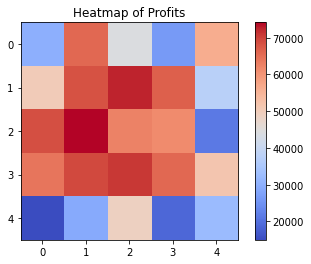

50810.49783549783


In [26]:
# Why we should do 2 expeditions:
divided_profits = calculate_profit(percentages)
print(divided_profits)
plt.imshow(divided_profits, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Add color bar to show scale
plt.title('Heatmap of Profits')
plt.show()
print(np.mean(divided_profits))